In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [156]:
athletes = pd.read_csv("/content/athlete_events.csv")
regions = pd.read_csv("/content/noc_regions.csv")

In [157]:
athletes_df = athletes.merge(regions, how="left", on="NOC")
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [158]:
athletes_df.shape

(271116, 17)

In [159]:
#making Column name Consistent
athletes_df.rename(columns={'region':'Region', 'notes' : 'Notes'}, inplace=True)
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [160]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [161]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [162]:
#checking Null Values
nan_values = athletes_df.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [163]:
# total number of null values
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [164]:
# athletes participated from india since 1896
athletes_df.query('Team == "India"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [165]:
 athletes_df.query('Team == "China"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
1072,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
2611,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [166]:
#Top 10 countries participated in term of players
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

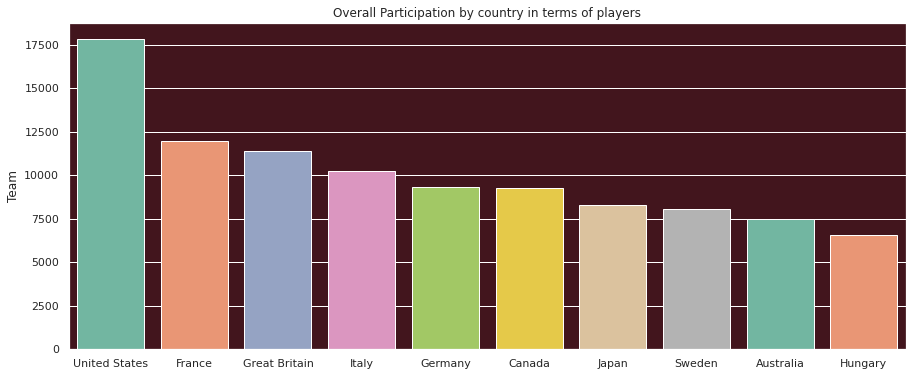

In [167]:
plt.figure(figsize=(15,6))
plt.title("Overall Participation by country in terms of players")
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2')

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <a list of 34 Patch objects>)

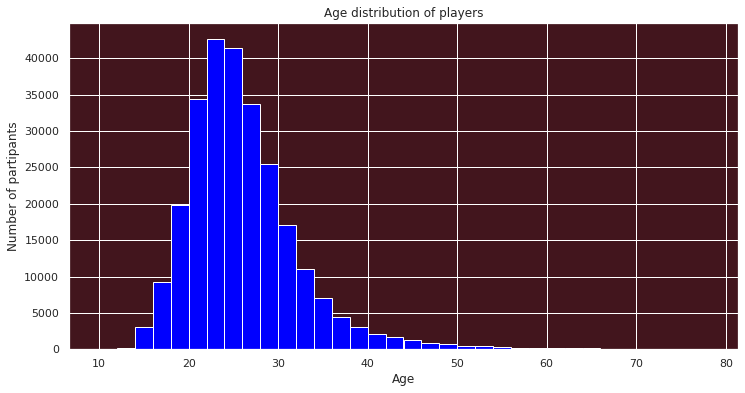

In [168]:
# Age distribution of the players
plt.figure(figsize=(12,6))
plt.title("Age distribution of players")
plt.xlabel("Age")
plt.ylabel("Number of partipants")
plt.hist(athletes_df.Age, bins=np.arange(10,80,2), color = "Blue", edgecolor="white")

In [169]:
winter_sports = athletes_df[athletes_df.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [170]:
summer_sports = athletes_df[athletes_df.Season=='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [171]:
# Male and Female players

gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdd81e03b10>,
 [Text(0.20089640434146097, -1.081499253223354, 'M'),
  Text(-0.2008963030841931, 1.081499272032628, 'F')],
 [Text(0.10957985691352415, -0.5899086835763748, '72.5&'),
  Text(-0.10957980168228713, 0.5899086938359788, '27.5&')])

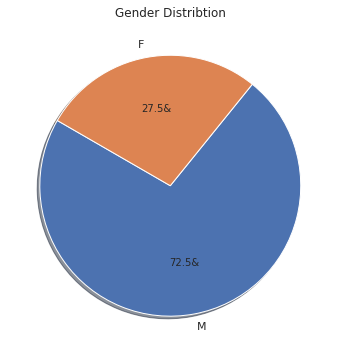

In [172]:
plt.figure(figsize=(12,6))
plt.title("Gender Distribtion")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f&', startangle=150, shadow=True)

In [173]:
# total medals players won
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [174]:
# female plyers in each olympics
female_participants = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Sex', 'Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [175]:
womenOlympics = athletes_df[(athletes_df.Sex == "F") & (athletes_df.Season == 'Summer')]

Text(0.5, 1.0, 'Women participation in Summer olympics')

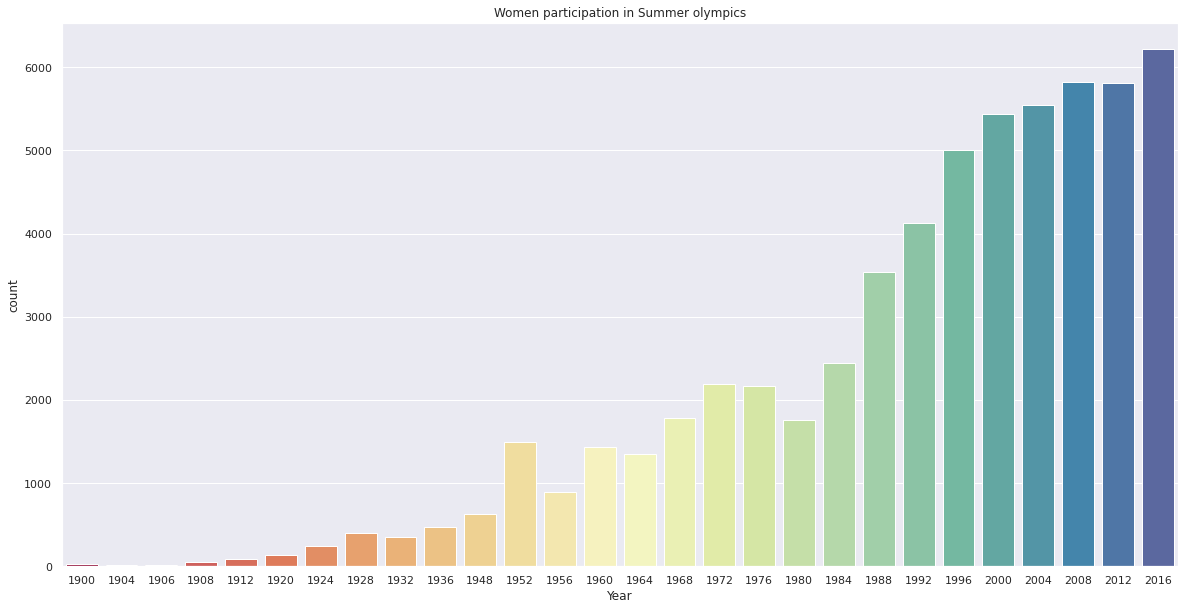

In [176]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenOlympics, palette="Spectral")
plt.title("Women participation in Summer olympics")

In [177]:
# Athletes Who have won Gold Medals
goldMedals = athletes_df[(athletes_df.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [178]:
goldMedals = goldMedals[np.isfinite(goldMedals["Age"])]

In [179]:
# Gold medals beyond the age of 60
goldMedals["ID"][goldMedals['Age']>60].count()

6

In [180]:
# in which sporting event they won the Gold Medal 
sporting_event = goldMedals['Sport'][goldMedals['Age']>60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sporting event in which athletes of age beyong 60 won')

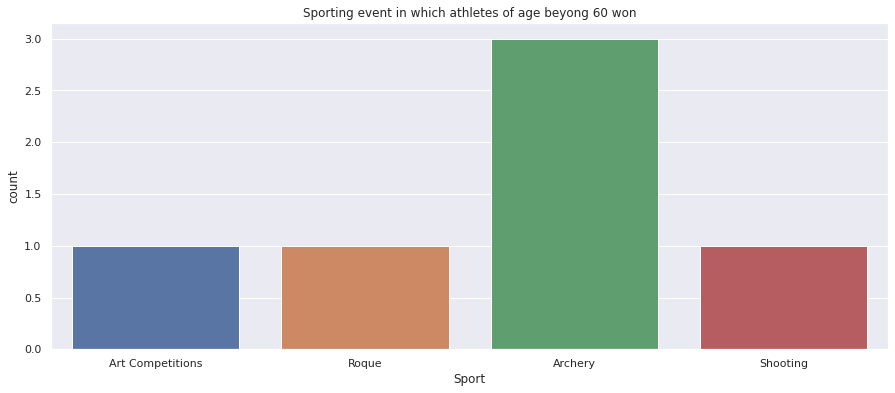

In [181]:
plt.figure(figsize=(15,6))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title("Sporting event in which athletes of age beyong 60 won")

In [182]:
#Gold Medals for each Country
goldMedals.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Gold Medals per Country')

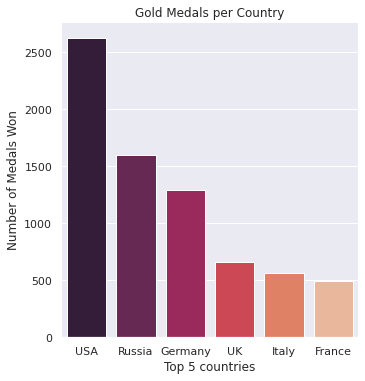

In [183]:
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name='Medal').head(6)
g = sns.catplot(x='index', y = 'Medal', data=totalGoldMedals, height=5, kind='bar', palette='rocket')
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals Won")
plt.title("Gold Medals per Country")

In [184]:
#Rio olympics

max_year = athletes_df.Year.max()
print(max_year)
team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team
team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'countrywise medal for Rio Olympics')

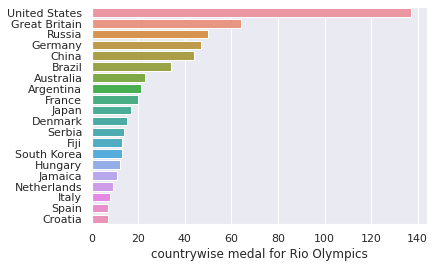

In [185]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)

plt.ylabel(None)
plt.xlabel('countrywise medal for Rio Olympics')

In [186]:
# height and weight of athletes who won Medals (Gold, silver, bronze)
not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df["Weight"].notnull())]


Text(0.5, 1.0, 'Height vs Weight of Olympics Medalist')

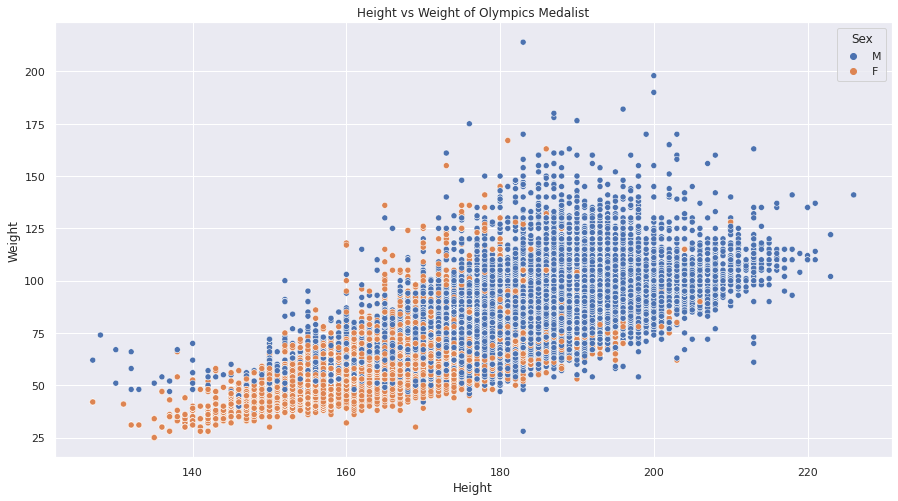

In [187]:
plt.figure(figsize = (15, 8))
axis = sns.scatterplot(x='Height', y = 'Weight', data = not_null_medals, hue = "Sex")
plt.title ('Height vs Weight of Olympics Medalist')

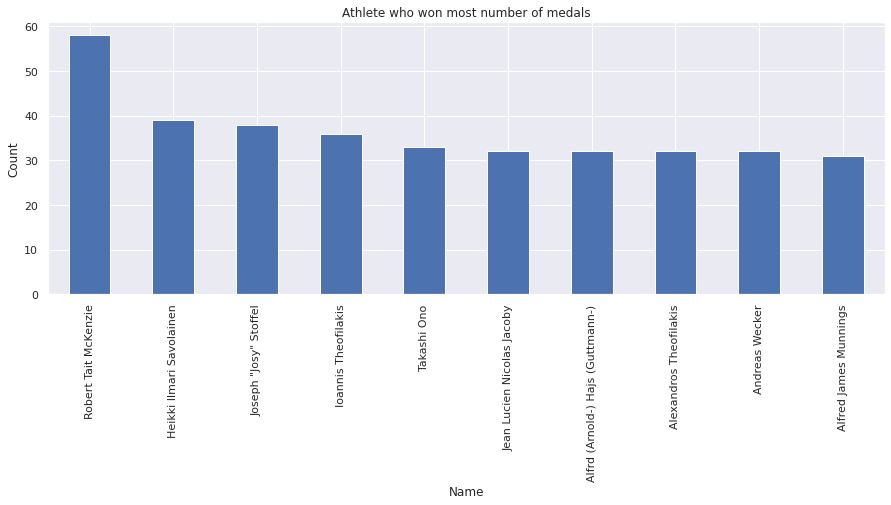

In [188]:
# Top 10 Athlete who won most number of medals
athletes_df_most_medal = athletes_df[['Name', 'Medal']]
athletes_df_most_medal = athletes_df_most_medal.value_counts("Name")
athletes_df_most_medal = athletes_df_most_medal.head(10)
athletes_df_most_medal.plot(kind='bar', title='Athlete who won most number of medals', ylabel='Count',xlabel='Name', figsize=(15, 5))

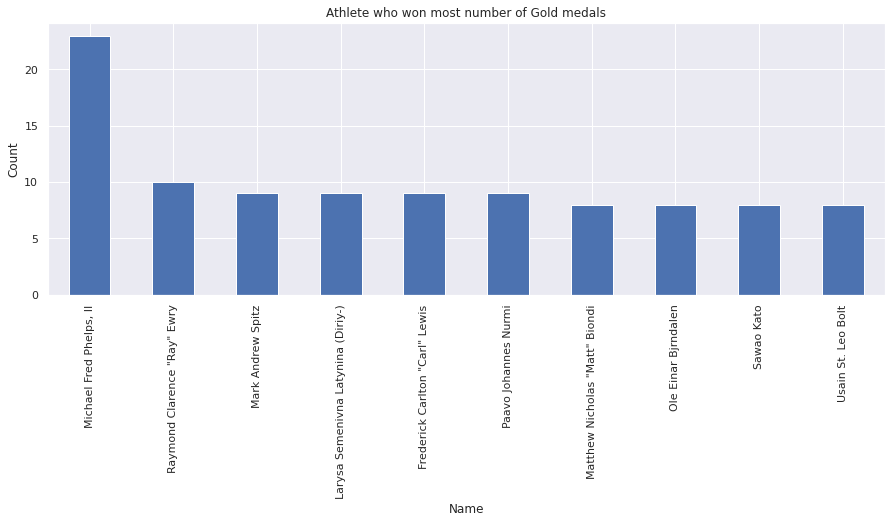

In [189]:
# Top 10 Athlete who won most number of medals
athletes_df_most_medal = athletes_df[['Name', 'Medal']]
most_gold = athletes_df_most_medal.loc[athletes_df_most_medal['Medal'] == "Gold"];
most_gold = most_gold.value_counts("Name")
most_gold = most_gold.head(10)
most_gold.plot(kind='bar', title='Athlete who won most number of Gold medals', ylabel='Count',xlabel='Name', figsize=(15, 5))

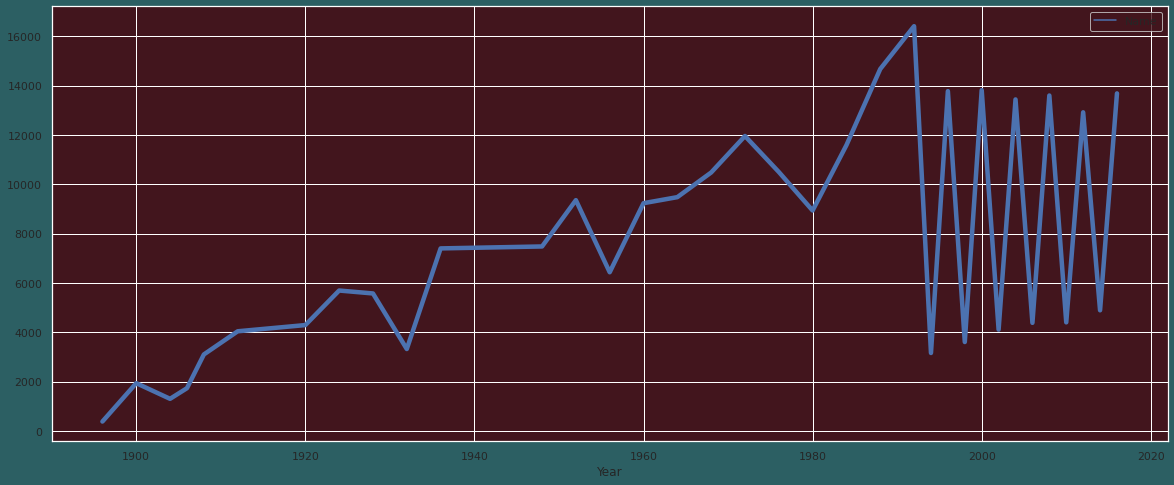

In [190]:
#Number of Athletes over the years
ath_year = athletes_df[['Name', 'Year']]
ath_year = ath_year.groupby("Year").agg(['count'])
sns.set(rc={'figure.figsize':(20,8)})
seaborn.set(rc={'axes.facecolor':'#42151d', 'figure.facecolor':'#2c5f63'})
fig, ax = plt.subplots()
sns.lineplot(data=ath_year, color='red', linewidth=4.5)

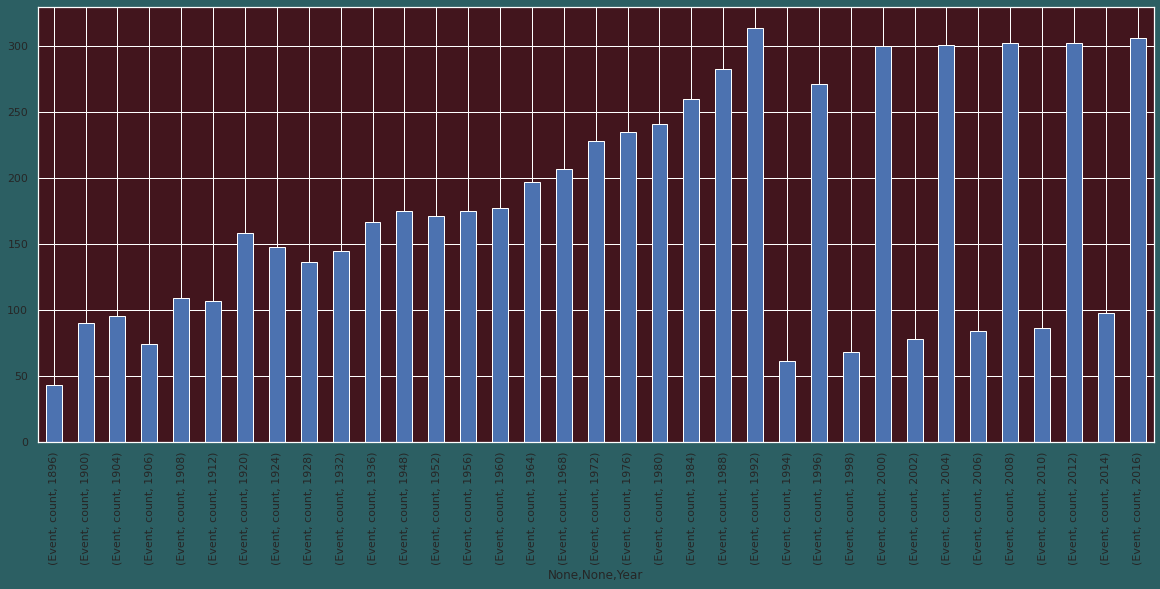

In [246]:
#Event Over the YEARS 
event_year = athletes_df[['Year', 'Event']]
event_year = event_year.drop_duplicates()
event_year = event_year.groupby("Year").agg(['count'])

sns.set(rc={'figure.figsize':(20,8)})
seaborn.set(rc={'axes.facecolor':'#42151d', 'figure.facecolor':'#2c5f63'})
fig, ax = plt.subplots()
event_year.groupby(["Year"]).mean().unstack().plot.bar()

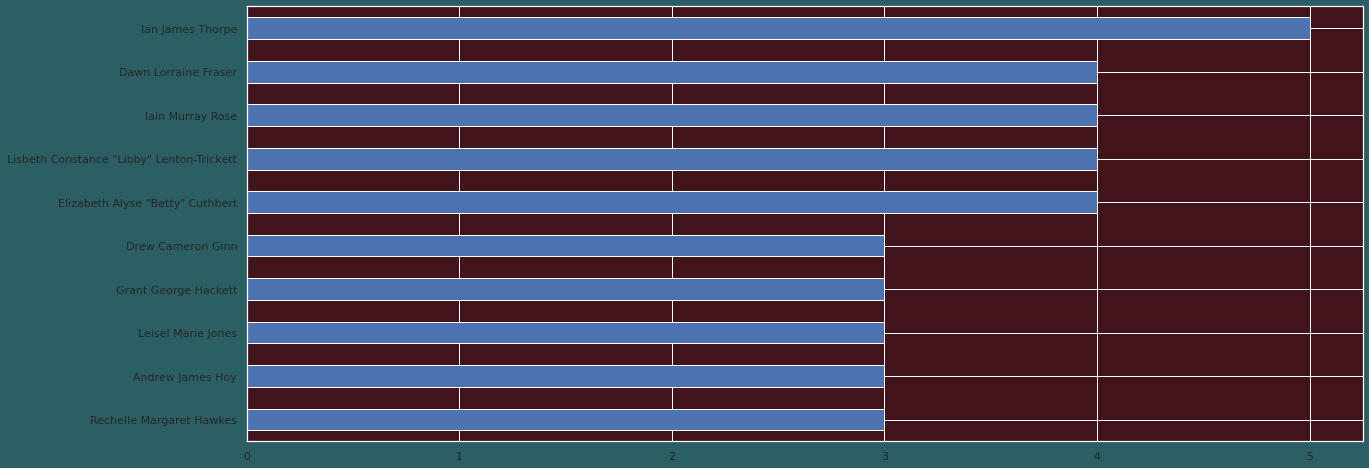

In [247]:
# 10 Most Successful Athletes from Australia
sec_aus = athletes_df[['Name', 'Team', 'Medal', 'Region', 'Event']]
sec_aus = sec_aus.loc[sec_aus['Region'] == "Australia"]
sec_aus = sec_aus.dropna()
sec_aus_gold = sec_aus.loc[sec_aus['Medal'] == "Gold"]
sec_aus_gold.Name.value_counts().head(10).sort_values().plot(kind = 'barh')

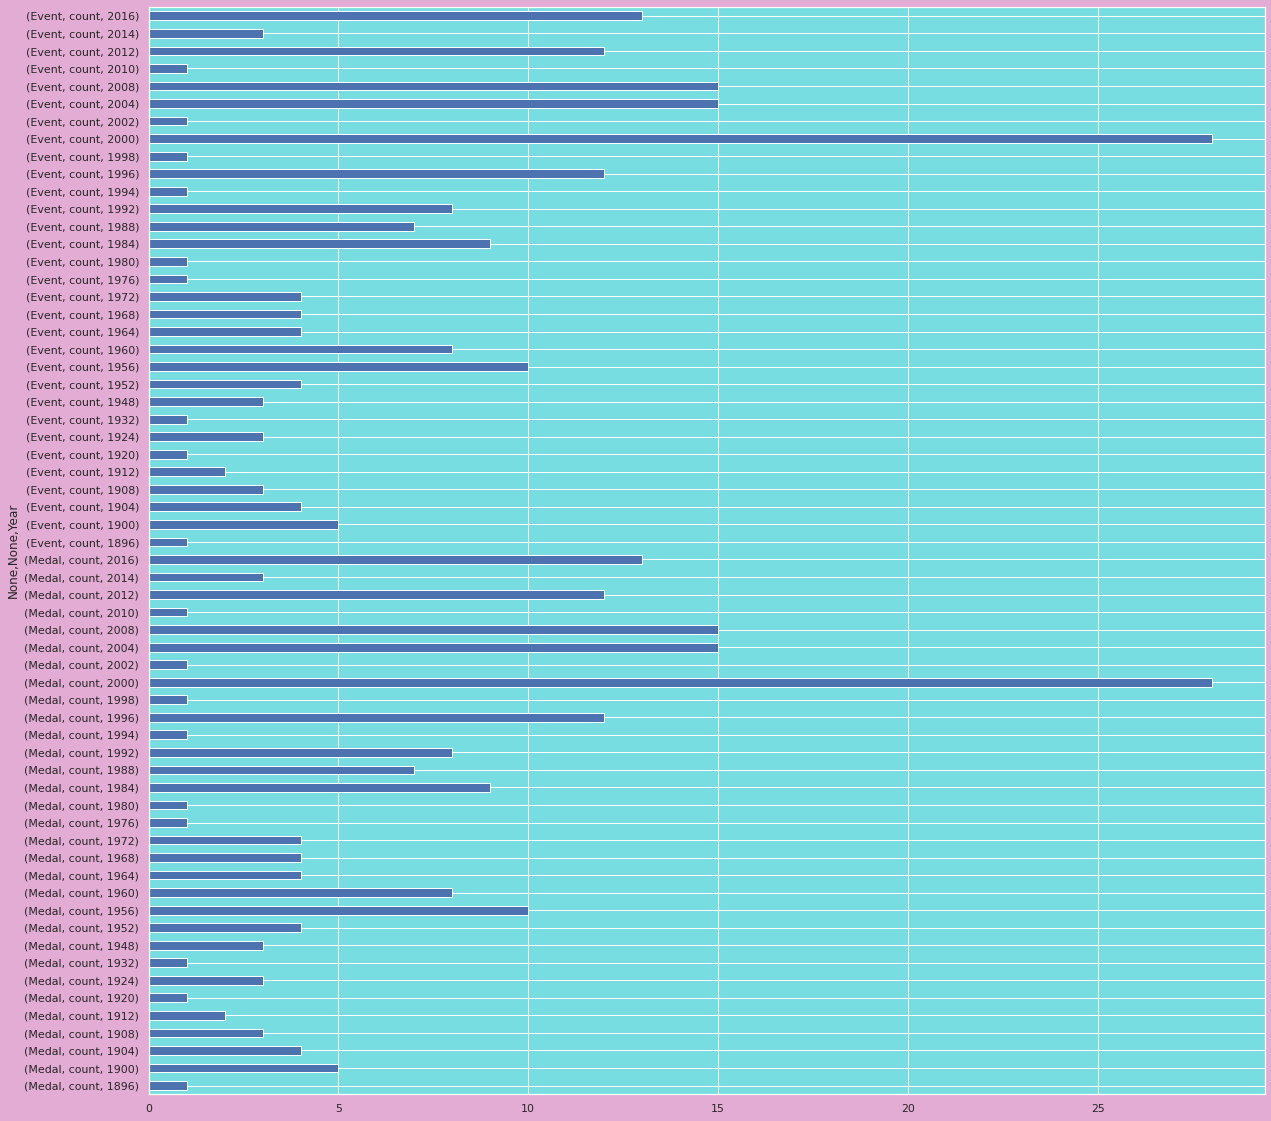

In [264]:
# Australia Medal Tally Over the years
medal_tally_aus = athletes_df[['Year', 'Medal', 'Region', 'Event']]
medal_tally_aus = medal_tally_aus.loc[medal_tally_aus['Region'] == "Australia"]
medal_tally_aus = medal_tally_aus.drop(['Region'], axis = 1)
medal_tally_aus = medal_tally_aus.dropna()
#medal_tally_aus = medal_tally_aus.loc[medal_tally_aus['Year'] == 2016]
medal_tally_aus = medal_tally_aus.drop_duplicates(subset='Event', keep="last")
medal_tally_aus.shape
medal_tally_aus = medal_tally_aus.groupby("Year").agg(['count'])
sns.set(rc={'figure.figsize':(20,20)})
seaborn.set(rc={'axes.facecolor':'#77dde0', 'figure.facecolor':'#e3acd4'})
fig, ax = plt.subplots()
medal_tally_aus.groupby(["Year"]).mean().unstack().plot.barh()

# And So on ....